In [1]:
# !conda init bash
# !conda activate assg

In [2]:
import os
print (os.environ['CONDA_DEFAULT_ENV'])

base


In [ ]:
pip install ./scikit-fda/

In [36]:
import pandas as pd
import numpy as np
import wbgapi as wb
import statsmodels.formula.api as smf
import statsmodels.api as sm


# 1.Setting up the data

In [5]:
df_country = pd.read_csv('CountrUsedN(1).csv')

country_name_list = df_country['country'].tolist()

country_list = list(wb.economy.coder(country_name_list).values())
country_set = set(country_list)


# years of interest
year_list = range(1994, 2022)

# measures of interest
wb_measures_list = df_country['Index'].tolist()

# import the data from the API
raw_dat = wb.data.DataFrame(wb_measures_list, country_set, year_list)

raw_dat = raw_dat.reset_index()


In [6]:
raw_dat['series'] = raw_dat['series']+'_'+ raw_dat['economy']
raw_dat_t = raw_dat.drop(['economy'],axis=1).T

raw_dat_t.columns = list(raw_dat_t.iloc[0,:])

raw_dat_t = raw_dat_t.iloc[1:,:]

# 2. Missing value inputation
## a. Removing the columns with more than 25 null values
## b. Filling nan with knn inputation technique

In [7]:
nan_sum = raw_dat_t.isna().sum()
raw_dat_t.dropna(thresh=len(raw_dat_t) - 3, axis=1,inplace=True)

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
raw_dat_inputed = pd.DataFrame(imputer.fit_transform(raw_dat_t))

raw_dat_inputed.columns = raw_dat_t.columns

# 3. Creating reponse CO2 per capita by dividing CO2 emission by total population

In [8]:
response = pd.DataFrame(raw_dat_inputed.filter(regex='EN.ATM.CO2E.KT').values/raw_dat_inputed.filter(regex='SP.POP.TOTL').values)

In [9]:
response.columns = ['CO2_per_capita' +'_'+i.split('_')[1] for i in raw_dat_inputed.filter(regex='EN.ATM.CO2E.KT').columns]

In [10]:
final_data = pd.concat([raw_dat_inputed,response],axis=1)

In [11]:
final_data.head()

,EG.FEC.RNEW.ZS_ARG,EN.ATM.CO2E.KT_ARG,NE.TRD.GNFS.ZS_ARG,NV.MNF.TECH.ZS.UN_ARG,NY.GDP.MKTP.PP.KD_ARG,SP.POP.TOTL_ARG,SP.URB.TOTL.IN.ZS_ARG,EG.FEC.RNEW.ZS_ARM,EN.ATM.CO2E.KT_ARM,NE.TRD.GNFS.ZS_ARM,...,CO2_per_capita_RUS,CO2_per_capita_SGP,CO2_per_capita_SRB,CO2_per_capita_SVK,CO2_per_capita_SVN,CO2_per_capita_SWE,CO2_per_capita_TUR,CO2_per_capita_UKR,CO2_per_capita_USA,CO2_per_capita_ZAF
0,10.734909,111910.0,18.134346,29.628354,6.224138e+11,34402669.0,87.960,17.763653,2740.0,112.429365,...,0.011354,0.011108,0.005029,0.007800,0.006841,0.006661,0.002672,0.008006,0.019256,0.006216
1,11.205185,112890.0,19.771423,27.200513,6.047048e+11,34828168.0,88.164,9.274353,3510.0,86.114857,...,0.011023,0.010662,0.005842,0.007902,0.007272,0.006597,0.002875,0.007751,0.019217,0.006379
2,10.193856,122550.0,21.506468,28.563551,6.381250e+11,35246376.0,88.366,12.473304,2580.0,79.229560,...,0.010807,0.010494,0.006780,0.007848,0.007689,0.007199,0.003119,0.006779,0.019575,0.006489
3,10.999073,126120.0,23.336179,30.983214,6.898836e+11,35657438.0,88.564,10.120114,3340.0,78.547745,...,0.010070,0.010053,0.007413,0.007852,0.007921,0.006487,0.003204,0.006488,0.020331,0.006724
4,11.343009,132670.0,23.350028,30.443321,7.164454e+11,36063451.0,88.759,9.380563,3470.0,71.842452,...,0.010076,0.009434,0.007428,0.007680,0.007822,0.006594,0.003158,0.006168,0.020266,0.006787


# 4. Functional Data Analysis

In [12]:
raw_dat_t.shape

(28, 392)

In [13]:
final_data.shape

(28, 448)

In [14]:
final_data.index = raw_dat_t.index

In [15]:
final_data.head()

,EG.FEC.RNEW.ZS_ARG,EN.ATM.CO2E.KT_ARG,NE.TRD.GNFS.ZS_ARG,NV.MNF.TECH.ZS.UN_ARG,NY.GDP.MKTP.PP.KD_ARG,SP.POP.TOTL_ARG,SP.URB.TOTL.IN.ZS_ARG,EG.FEC.RNEW.ZS_ARM,EN.ATM.CO2E.KT_ARM,NE.TRD.GNFS.ZS_ARM,...,CO2_per_capita_RUS,CO2_per_capita_SGP,CO2_per_capita_SRB,CO2_per_capita_SVK,CO2_per_capita_SVN,CO2_per_capita_SWE,CO2_per_capita_TUR,CO2_per_capita_UKR,CO2_per_capita_USA,CO2_per_capita_ZAF
YR1994,10.734909,111910.0,18.134346,29.628354,6.224138e+11,34402669.0,87.960,17.763653,2740.0,112.429365,...,0.011354,0.011108,0.005029,0.007800,0.006841,0.006661,0.002672,0.008006,0.019256,0.006216
YR1995,11.205185,112890.0,19.771423,27.200513,6.047048e+11,34828168.0,88.164,9.274353,3510.0,86.114857,...,0.011023,0.010662,0.005842,0.007902,0.007272,0.006597,0.002875,0.007751,0.019217,0.006379
YR1996,10.193856,122550.0,21.506468,28.563551,6.381250e+11,35246376.0,88.366,12.473304,2580.0,79.229560,...,0.010807,0.010494,0.006780,0.007848,0.007689,0.007199,0.003119,0.006779,0.019575,0.006489
YR1997,10.999073,126120.0,23.336179,30.983214,6.898836e+11,35657438.0,88.564,10.120114,3340.0,78.547745,...,0.010070,0.010053,0.007413,0.007852,0.007921,0.006487,0.003204,0.006488,0.020331,0.006724
YR1998,11.343009,132670.0,23.350028,30.443321,7.164454e+11,36063451.0,88.759,9.380563,3470.0,71.842452,...,0.010076,0.009434,0.007428,0.007680,0.007822,0.006594,0.003158,0.006168,0.020266,0.006787


In [16]:
import skfda

In [17]:
import matplotlib.pyplot as plt

In [18]:
final_data = final_data.T.reset_index()

In [19]:
final_data.head()

,index,YR1994,YR1995,YR1996,YR1997,YR1998,YR1999,YR2000,YR2001,YR2002,...,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021
0,EG.FEC.RNEW.ZS_ARG,1.073491e+01,1.120518e+01,1.019386e+01,1.099907e+01,1.134301e+01,1.030617e+01,9.850000e+00,1.151000e+01,1.162000e+01,...,8.610000e+00,8.910000e+00,9.790000e+00,9.400000e+00,9.380000e+00,1.037000e+01,1.052000e+01,1.074000e+01,1.063000e+01,1.063000e+01
1,EN.ATM.CO2E.KT_ARG,1.119100e+05,1.128900e+05,1.225500e+05,1.261200e+05,1.326700e+05,1.345100e+05,1.322700e+05,1.252600e+05,1.174700e+05,...,1.779600e+05,1.832500e+05,1.796000e+05,1.855500e+05,1.831600e+05,1.793200e+05,1.769000e+05,1.681000e+05,1.725000e+05,1.725000e+05
2,NE.TRD.GNFS.ZS_ARG,1.813435e+01,1.977142e+01,2.150647e+01,2.333618e+01,2.335003e+01,2.138274e+01,2.262244e+01,2.185226e+01,4.175272e+01,...,3.052654e+01,2.933393e+01,2.840679e+01,2.248623e+01,2.609389e+01,2.528960e+01,3.076254e+01,3.221445e+01,3.014814e+01,3.342920e+01
3,NV.MNF.TECH.ZS.UN_ARG,2.962835e+01,2.720051e+01,2.856355e+01,3.098321e+01,3.044332e+01,2.810712e+01,2.859574e+01,2.698261e+01,2.600065e+01,...,2.697555e+01,2.734322e+01,2.611319e+01,2.603289e+01,2.761984e+01,2.809410e+01,2.761229e+01,2.633918e+01,2.697573e+01,2.697573e+01
4,NY.GDP.MKTP.PP.KD_ARG,6.224138e+11,6.047048e+11,6.381250e+11,6.898836e+11,7.164454e+11,6.921904e+11,6.867290e+11,6.564522e+11,5.849352e+11,...,1.006559e+12,1.030770e+12,1.004871e+12,1.032316e+12,1.010840e+12,1.039331e+12,1.012127e+12,9.916222e+11,8.934985e+11,9.852050e+11


In [20]:
data_matrix = final_data[final_data['index'].str.contains('EN.ATM.CO2E.KT')].iloc[:,1:].values

In [21]:
grid_points=list(range(1994,2022,1))

In [22]:
fd = skfda.FDataGrid(
    data_matrix=data_matrix.tolist(),
    grid_points=grid_points,
)

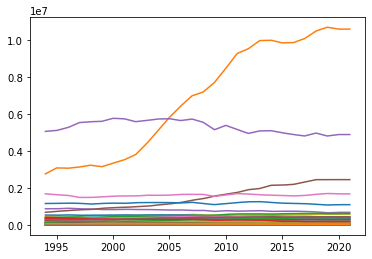

In [23]:
fd.plot()
plt.show()

## In above graph, it is difficult to differentiate between the lines, so therefore we can use np.log to make it more visible to user

In [24]:
logCO2perCap = np.log(CO2perCapita)
logCO2perCap_list = logCO2perCap.tolist()
#print(CO2_list)
grid_points=list(range(1994,2022,1))

NameError: name 'CO2perCapita' is not defined

In [ ]:
fd = skfda.FDataGrid(data_matrix=logCO2perCap_list, grid_points=grid_points)
fd.plot()
plt.show()

## By using log, the graph looks visible

0.8406826459974687


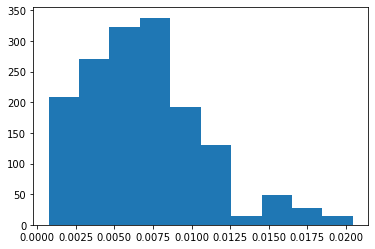

In [25]:

# investigate the skewness of the reponce
tot_pop = final_data[final_data['index'].str.contains('SP.POP.TOTL')].iloc[:,1:].values
co2 = final_data[final_data['index'].str.contains('EN.ATM.CO2E.KT')].iloc[:,1:].values
from scipy.stats import skew
CO2perCapita = co2/tot_pop
dummy=CO2perCapita.flatten()
print(skew(dummy))
plt.hist(dummy)
plt.show()

## Above graphs represents, response which is CO2percapita is rightly skewed

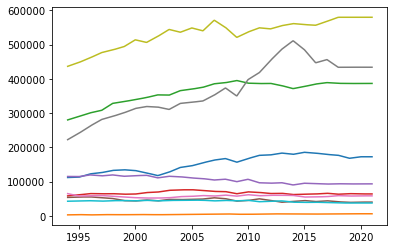

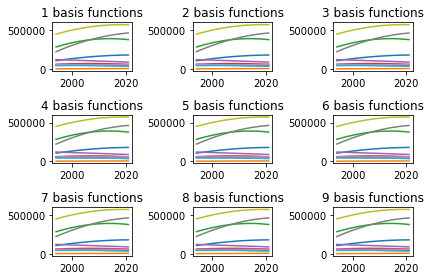

In [26]:
max_basis = 9

# Select only the first 5 samples
fd1 = fd[:10]
fd1.plot()

fig, axes = plt.subplots(nrows=3, ncols=3)

for n_basis in range(1, max_basis + 1):
#     print (n_basis)
    basis = skfda.representation.basis.MonomialBasis(n_basis=n_basis+3)
    X_basis = fd1.to_basis(basis)

    ax = axes.ravel()[n_basis - 1]
    fig = X_basis.plot(axes=ax)
    ax.set_title(f"{n_basis} basis functions")

fig.tight_layout()
plt.show()

## As the number of basis function increases the overfitting risk, because the fit gets too much aligned with the data points

In [27]:
basis = skfda.representation.basis.MonomialBasis(n_basis=7)
X_basis = fd1.to_basis(basis)

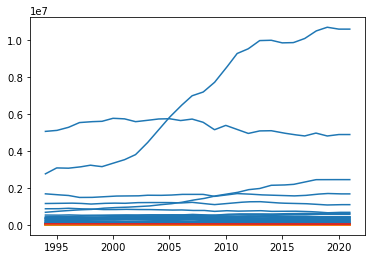

In [28]:
clusterer = skfda.ml.clustering.KMeans(n_clusters=4)
y_pred = clusterer.fit_predict(fd)

fd.plot(group=y_pred)
plt.show()

In [29]:
ind_list = df_country.Index.to_list()
indexes = ind_list[:7]
indexes

['EN.ATM.CO2E.KT',
 'NY.GDP.MKTP.PP.KD',
 'SP.POP.TOTL',
 'EG.FEC.RNEW.ZS',
 'SP.URB.TOTL.IN.ZS',
 'NV.MNF.TECH.ZS.UN',
 'NE.TRD.GNFS.ZS']

In [30]:
countries = df_country.country.to_list()
# country_list

In [31]:
iso_code = wb.economy.coder(countries[0])
df = wb.data.DataFrame(indexes, iso_code, time=range(1994, 2022))
df = df.T
df = df.dropna()
df

series,EG.FEC.RNEW.ZS,EN.ATM.CO2E.KT,NE.TRD.GNFS.ZS,NV.MNF.TECH.ZS.UN,NY.GDP.MKTP.PP.KD,SP.POP.TOTL,SP.URB.TOTL.IN.ZS
YR1994,10.734909,111910.000000,18.134346,29.628354,6.224138e+11,34402669.0,87.960
YR1995,11.205185,112890.000000,19.771423,27.200513,6.047048e+11,34828168.0,88.164
YR1996,10.193856,122550.000000,21.506468,28.563551,6.381250e+11,35246376.0,88.366
YR1997,10.999073,126120.000000,23.336179,30.983214,6.898836e+11,35657438.0,88.564
YR1998,11.343009,132670.000000,23.350028,30.443321,7.164454e+11,36063451.0,88.759
YR1999,10.306173,134510.000000,21.382745,28.107123,6.921904e+11,36467218.0,88.952
YR2000,9.850000,132270.000000,22.622445,28.595738,6.867290e+11,36870796.0,89.142
YR2001,11.510000,125260.000000,21.852255,26.982610,6.564522e+11,37275644.0,89.329
YR2002,11.620000,117470.001221,41.752724,26.000648,5.849352e+11,37681743.0,89.510
YR2003,10.820000,127660.003662,40.644748,26.000648,6.366261e+11,38087866.0,89.686


In [40]:
res_list = []

for x in countries:
    
    iso_code = wb.economy.coder(x)
    df = wb.data.DataFrame(indexes, iso_code, time=range(1994, 2022))
    df = df.T
    df = df.dropna()
    
    x = df.drop(["EN.ATM.CO2E.KT"], axis=1)
    X = sm.add_constant(x)
    Y = df["EN.ATM.CO2E.KT"]
    # model = smf.ols(formula="'EN.ATM.CO2E.KT' ~ .", data=df)
    model = sm.OLS(Y, X)
    model = model.fit()
    
    res = model.resid
    print(res)
    res_list.append({x:res})
    
res_list

YR1994   -3955.466127
YR1995   -1115.906214
YR1996    1161.350019
YR1997     -80.711920
YR1998    3222.539139
YR1999    3173.274309
YR2000   -1233.589088
YR2001   -2774.094008
YR2002    -889.480775
YR2003     910.843311
YR2004    4234.829753
YR2005    2461.735624
YR2006    3070.791221
YR2007    -604.375779
YR2008    -935.294241
YR2009   -6574.474677
YR2010   -5115.943432
YR2011   -1377.486654
YR2012    -857.420234
YR2013    2320.144093
YR2014    3033.814675
YR2015    4023.161798
YR2016    3671.168749
YR2017    -886.970463
YR2018     571.675326
YR2019   -5454.834147
dtype: float64


TypeError: unhashable type: 'DataFrame'